In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import hddm
import kabuki
print("The current version of kabuki is: ", kabuki.__version__)
print("The current version of HDDM is: ", hddm.__version__)

The current version of kabuki is:  0.6.5RC4
The current version of HDDM is:  0.8.0


In [2]:
data, params = hddm.generate.gen_rand_data(params={'easy': {'v': 1, 'a': 2, 't': .3},
                                                   'hard': {'v': 1, 'a': 2, 't': .3}})

In [3]:
m = hddm.HDDM(data, depends_on={'v': 'condition'},
             include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
# save_name argument provided by our modified version of kabuki
m.sample(1000, burn=20, save_name = "test/model_for_ppc")

 [-----------------100%-----------------] 1000 of 1000 complete in 4.6 sechddm sampling elpased time:  4.57 s


In [4]:
print(m.nodes_db)

           knode_name stochastic observed   subj        node      tag   
a                   a       True    False  False           a       ()  \
v(easy)             v       True    False  False     v(easy)  (easy,)   
v(hard)             v       True    False  False     v(hard)  (hard,)   
t                   t       True    False  False           t       ()   
z_trans       z_trans       True    False  False     z_trans       ()   
z                   z      False    False  False           z       ()   
wfpt(easy)       wfpt      False     True  False  wfpt(easy)  (easy,)   
wfpt(hard)       wfpt      False     True  False  wfpt(hard)  (hard,)   

                depends hidden   rt response subj_idx condition      mean   
a                    []  False  NaN      NaN      NaN       NaN  1.994739  \
v(easy)     [condition]  False  NaN      NaN      NaN      easy  1.467312   
v(hard)     [condition]  False  NaN      NaN      NaN      hard  1.773563   
t                    []  False  Na

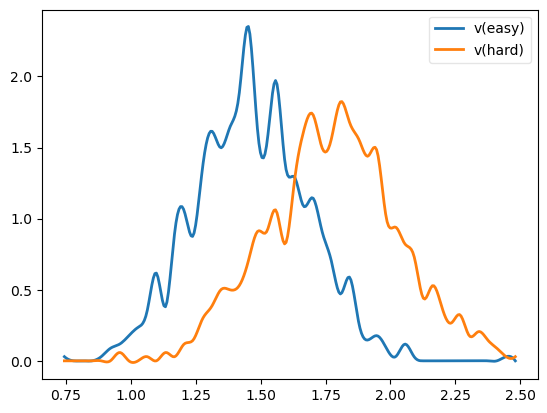

In [5]:
hddm.analyze.plot_posterior_nodes(m.nodes_db.loc[['v(easy)', 'v(hard)'], 'node'])

In [6]:
%%time
ppc_data = hddm.utils.post_pred_gen(m)
ppc_data

Start generating posterior prediction...
CPU times: user 170 ms, sys: 64.5 ms, total: 234 ms
Wall time: 6.79 s


rt  response
node       draw trial_idx                    
wfpt(easy) 0    0          0.531424       1.0
                1          1.412924       1.0
                2          1.024124       1.0
                3          0.952524       1.0
                4          0.824624       1.0
...                             ...       ...
wfpt(hard) 499  95         0.951250       1.0
                96         0.628450       1.0
                97         0.683050       1.0
                98        -0.433850       0.0
                99         0.884450       1.0

[50000 rows x 2 columns]

In [7]:
# an alternative way generate posterior prediction by using our methods 
m.to_infdata(ppc=True)

Start generating posterior prediction...
The time of generating PPC took 5.954 seconds
Start converting to InferenceData...
find the existed save name: $test/model_for_ppc


Inference data with groups:
	> posterior
	> posterior_predictive
	> observed_data

In [8]:
hddm.utils.post_pred_stats(data, ppc_data)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.940000,0.933280,0.047122,0.000045,0.002266,True,48.850000,0.142610
mean_ub,0.928447,0.903851,0.090105,0.000605,0.008724,True,63.700000,0.272971
std_ub,0.415503,0.394036,0.089040,0.000461,0.008389,True,63.100000,0.241094
10q_ub,0.507600,0.521175,0.040982,0.000184,0.001864,True,39.200000,0.331247
30q_ub,0.616500,0.654316,0.058599,0.001430,0.004864,True,27.900000,0.645338
50q_ub,0.856500,0.798876,0.081398,0.003321,0.009946,True,78.400000,0.707928
70q_ub,1.084600,1.004183,0.120490,0.006467,0.020985,True,77.200000,0.667417
90q_ub,1.520300,1.417859,0.216517,0.010494,0.057374,True,72.400000,0.473132
mean_lb,-0.605333,-0.791703,0.259675,0.034734,0.102165,True,75.708061,0.717705


In [9]:
ppc_data.head(10)

rt  response
node       draw trial_idx                    
wfpt(easy) 0    0          0.531424       1.0
                1          1.412924       1.0
                2          1.024124       1.0
                3          0.952524       1.0
                4          0.824624       1.0
                5          0.659424       1.0
                6          1.776724       1.0
                7         -0.946024       0.0
                8          0.660024       1.0
                9          0.965124       1.0

In [10]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)

In [11]:
ppc_compare.head(10)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.940000,0.933280,0.047122,0.000045,0.002266,True,48.850000,0.142610
mean_ub,0.928447,0.903851,0.090105,0.000605,0.008724,True,63.700000,0.272971
std_ub,0.415503,0.394036,0.089040,0.000461,0.008389,True,63.100000,0.241094
10q_ub,0.507600,0.521175,0.040982,0.000184,0.001864,True,39.200000,0.331247
30q_ub,0.616500,0.654316,0.058599,0.001430,0.004864,True,27.900000,0.645338
50q_ub,0.856500,0.798876,0.081398,0.003321,0.009946,True,78.400000,0.707928
70q_ub,1.084600,1.004183,0.120490,0.006467,0.020985,True,77.200000,0.667417
90q_ub,1.520300,1.417859,0.216517,0.010494,0.057374,True,72.400000,0.473132
mean_lb,-0.605333,-0.791703,0.259675,0.034734,0.102165,True,75.708061,0.717705


In [12]:
%%time
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, call_compare=False)

CPU times: user 963 ms, sys: 33 µs, total: 963 ms
Wall time: 962 ms


In [13]:
ppc_stats.head(10)

accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub   
node       draw                                                               
wfpt(easy) 0         0.90  0.963441  0.433809  0.529564  0.659544  0.824624  \
           1         0.96  0.908850  0.459514  0.494015  0.572165  0.732375   
           2         0.98  0.874470  0.361674  0.507426  0.684226  0.770026   
           3         0.84  0.847266  0.381384  0.485627  0.609497  0.706647   
           4         0.98  0.899487  0.350881  0.512414  0.627474  0.795934   
           5         0.96  0.967136  0.505828  0.447283  0.617343  0.797023   
           6         0.96  0.726935  0.245828  0.474419  0.566169  0.675189   
           7         0.98  0.893183  0.338269  0.541183  0.684963  0.811883   
           8         0.94  0.951849  0.423706  0.551020  0.648680  0.786300   
           9         0.82  0.840484  0.317277  0.488872  0.652472  0.768872   

                   70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb   
node       draw                                                               
wfpt(easy) 0     1.023864  1.637624 -0.968784  0.481627  0.644504  0.679624  \
           1     0.964615  1.602565 -1.969375  1.459650  0.801655  1.385515   
           2     0.937086  1.334246 -1.017326  0.000000  1.017326  1.017326   
           3     0.939077  1.348937 -0.859097  0.311862  0.429257  0.770977   
           4     1.082534  1.361114 -0.525834  0.000000  0.525834  0.525834   
           5     1.132553  1.638303 -1.795673  0.429350  1.452193  1.623933   
           6     0.813279  1.050219 -0.908289  0.374450  0.608729  0.758509   
           7     1.032163  1.335743 -0.354883  0.000000  0.354883  0.354883   
           8     1.126220  1.635700 -0.585500  0.109251  0.502020  0.510660   
           9     0.946572  1.222172 -0.640728  0.458164  0.369692  0.392332   

                   50q_lb    70q_lb    90q_lb  
node       draw                                
wfpt(easy) 0     0.692424  0.895304  1.521904  
           1     1.969375  2.553235  3.137095  
           2     1.017326  1.017326  1.017326  
           3     0.828197  1.073157  1.217317  
           4     0.525834  0.525834  0.525834  
           5     1.795673  1.967413  2.139153  
           6     0.908289  1.058069  1.207849  
           7     0.354883  0.354883  0.354883  
           8     0.519300  0.607380  0.695460  
           9     0.439272  0.607112  0.960532

## Using PPC for model comparison with the `groupby` argument

In [14]:
m_pooled = hddm.HDDM(data, # v does not depend on conditions
                    include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False) 
m_pooled.sample(1000, burn=20, save_name = "test/m_pooled")
ppc_data_pooled = hddm.utils.post_pred_gen(m_pooled, groupby=['condition'])

 [-----------------100%-----------------] 1000 of 1000 complete in 2.9 sechddm sampling elpased time:  2.924 s
Start generating posterior prediction...


In [15]:
hddm.utils.post_pred_stats(data, ppc_data_pooled)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.940000,0.937570,0.033027,0.000006,0.001097,True,47.200000,0.073576
mean_ub,0.928447,0.903812,0.060311,0.000607,0.004244,True,68.700000,0.408462
std_ub,0.415503,0.403707,0.066001,0.000139,0.004495,True,59.600000,0.178723
10q_ub,0.507600,0.512773,0.031517,0.000027,0.001020,True,45.100000,0.164145
30q_ub,0.616500,0.648590,0.040640,0.001030,0.002681,True,21.400000,0.789618
50q_ub,0.856500,0.797790,0.056707,0.003447,0.006663,True,84.200000,1.035315
70q_ub,1.084600,1.005264,0.081647,0.006294,0.012961,True,81.400000,0.971693
90q_ub,1.520300,1.429298,0.151142,0.008281,0.031125,True,75.100000,0.602096
mean_lb,-0.605333,-0.788055,0.188469,0.033387,0.068908,True,85.222672,0.969505


## Defining your own summary statistics

In [16]:
%%time
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, stats=lambda x: np.mean(x), call_compare=False)

CPU times: user 125 ms, sys: 31 µs, total: 125 ms
Wall time: 124 ms


In [17]:
ppc_stats.head()

stat
node       draw          
wfpt(easy) 0     0.770219
           1     0.793721
           2     0.836635
           3     0.574248
           4     0.870980

## Summary statistics relating to outside variables

Note, posterior predictive checks for hddm regression model is not available in HDDM 0.8.0.

The below code show how to plot the ppc for each subject in HDDM 0.9.8 or above. 

In [18]:
from numpy.random import randn
data['trlbytrl'] = randn(len(data))

In [19]:
m_reg = hddm.HDDMRegressor(data, 'v ~ trlbytrl',
                          include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
m_reg.sample(1000, burn=20, save_name = "test/m_reg")

Adding these covariates:
['v_Intercept', 'v_trlbytrl']
 [-----------------100%-----------------] 1000 of 1000 complete in 16.4 sechddm sampling elpased time:  16.4 s


In [20]:
%%time
ppc_data = hddm.utils.post_pred_gen(m_reg, append_data=True)
ppc_data

Start generating posterior prediction...
CPU times: user 84.9 ms, sys: 8.07 ms, total: 92.9 ms
Wall time: 1min 58s


rt_sampled response_sampled  index     rt  response   
node draw trial_idx                                                        
wfpt 0    0            0.935817              1.0      0  0.569       1.0  \
          1           -0.852136              0.0      1  1.790       1.0   
          2            0.762617              1.0      2  1.545       1.0   
          3            0.723617              1.0      3  0.480       1.0   
          4            0.503817              1.0      4  1.732       1.0   
...                         ...              ...    ...    ...       ...   
     499  95          -1.740863              0.0     95  1.237       1.0   
          96           0.799928              1.0     96  0.976       1.0   
          97           1.066728              1.0     97  0.882       1.0   
          98           0.697528              1.0     98 -0.444       0.0   
          99           0.432528              1.0     99  0.855       1.0   

                     subj_idx condition  trlbytrl  
node draw trial_idx                                
wfpt 0    0                 0      easy -0.282153  
          1                 0      easy  0.007739  
          2                 0      easy  0.692438  
          3                 0      easy -0.451765  
          4                 0      easy -0.367727  
...                       ...       ...       ...  
     499  95                0      hard  0.442037  
          96                0      hard  1.853986  
          97                0      hard  1.841805  
          98                0      hard  0.185710  
          99                0      hard  1.327410  

[50000 rows x 8 columns]

In [21]:
from scipy.stats import linregress
ppc_regression = []
for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    ppc_regression.append(linregress(sim_data.trlbytrl, sim_data.rt_sampled)[0]) # slope

orig_regression = linregress(data.trlbytrl, data.rt)[0]

Text(0.5, 0, 'slope')

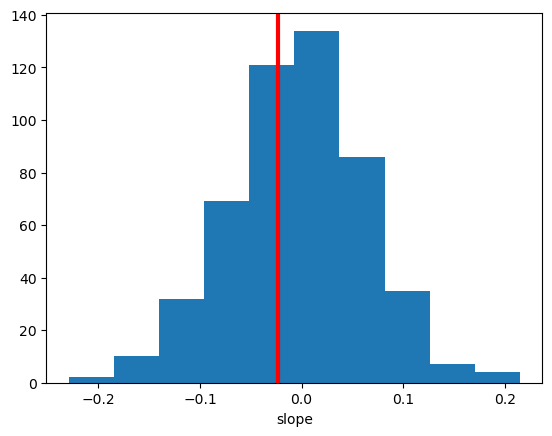

In [22]:
plt.hist(ppc_regression)
plt.axvline(orig_regression, c='r', lw=3)
plt.xlabel('slope')